In [38]:
import matplotlib.pyplot as plt
import pydicom as dicom
import matplotlib
import os, os.path
import imageio
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
import pyvista as pv

In [4]:
def file_names(directory_path, file_type):
    '''file path XXXX'''
    all_files = os.listdir(directory_path)
    file_names = [file for file in all_files if file.lower().endswith('.' + file_type)]
    return file_names

In [7]:
directory_path = 'manifest-1729153551742/LIDC-IDRI/LIDC-IDRI-0001/01-01-2000-NA-NA-30178/3000566.000000-NA-03192/'
file_type = 'dcm'

In [8]:
files = file_names(directory_path, file_type)
files.sort()
print(files)

['1-001.dcm', '1-002.dcm', '1-003.dcm', '1-004.dcm', '1-005.dcm', '1-006.dcm', '1-007.dcm', '1-008.dcm', '1-009.dcm', '1-010.dcm', '1-011.dcm', '1-012.dcm', '1-013.dcm', '1-014.dcm', '1-015.dcm', '1-016.dcm', '1-017.dcm', '1-018.dcm', '1-019.dcm', '1-020.dcm', '1-021.dcm', '1-022.dcm', '1-023.dcm', '1-024.dcm', '1-025.dcm', '1-026.dcm', '1-027.dcm', '1-028.dcm', '1-029.dcm', '1-030.dcm', '1-031.dcm', '1-032.dcm', '1-033.dcm', '1-034.dcm', '1-035.dcm', '1-036.dcm', '1-037.dcm', '1-038.dcm', '1-039.dcm', '1-040.dcm', '1-041.dcm', '1-042.dcm', '1-043.dcm', '1-044.dcm', '1-045.dcm', '1-046.dcm', '1-047.dcm', '1-048.dcm', '1-049.dcm', '1-050.dcm', '1-051.dcm', '1-052.dcm', '1-053.dcm', '1-054.dcm', '1-055.dcm', '1-056.dcm', '1-057.dcm', '1-058.dcm', '1-059.dcm', '1-060.dcm', '1-061.dcm', '1-062.dcm', '1-063.dcm', '1-064.dcm', '1-065.dcm', '1-066.dcm', '1-067.dcm', '1-068.dcm', '1-069.dcm', '1-070.dcm', '1-071.dcm', '1-072.dcm', '1-073.dcm', '1-074.dcm', '1-075.dcm', '1-076.dcm', '1-077.dcm'

In [9]:
three_d_array = []
for file in files:
    filename=file.replace('.dcm', '') +'.png'
    image_path = '{}/{}'.format(directory_path,file)
    ds = dicom.dcmread(image_path)
    three_d_array.append(ds.pixel_array)
combined_array = np.stack(three_d_array, axis=1)
print(combined_array)

[[[-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  ...
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]]

 [[-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  ...
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]]

 [[-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  ...
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]]

 ...

 [[-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  ...
  [-1024 -1024 -1024 ... -1024 -1024 -10

In [17]:
imgvals = np.squeeze(combined_array)
imgvals.shape

(512, 133, 512)

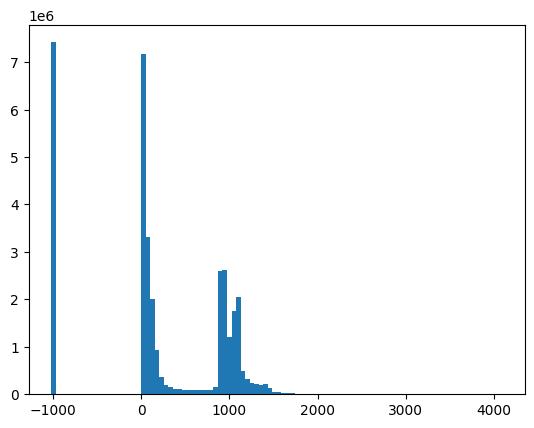

In [18]:
# plot a histogram of the voxel values
plt.hist(np.ndarray.flatten(imgvals),bins=100)
plt.show()

In [19]:
imgvals = np.where(imgvals > 500, 1, 0)

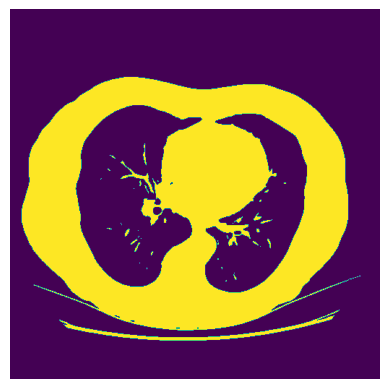

In [20]:
plt.imshow(imgvals[:,60,:])
plt.axis('off')
plt.show()

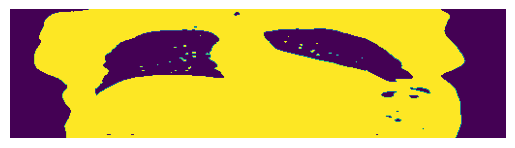

In [21]:
plt.imshow(imgvals[200,:,:])
plt.axis('off')
plt.show()

In [25]:
imgvals

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [23]:
# Volume data
volume_data = imgvals

# Isosurface value
iso_value = 0.5

# Extract the isosurface
vertices, faces, normals, values = measure.marching_cubes(volume_data, iso_value)

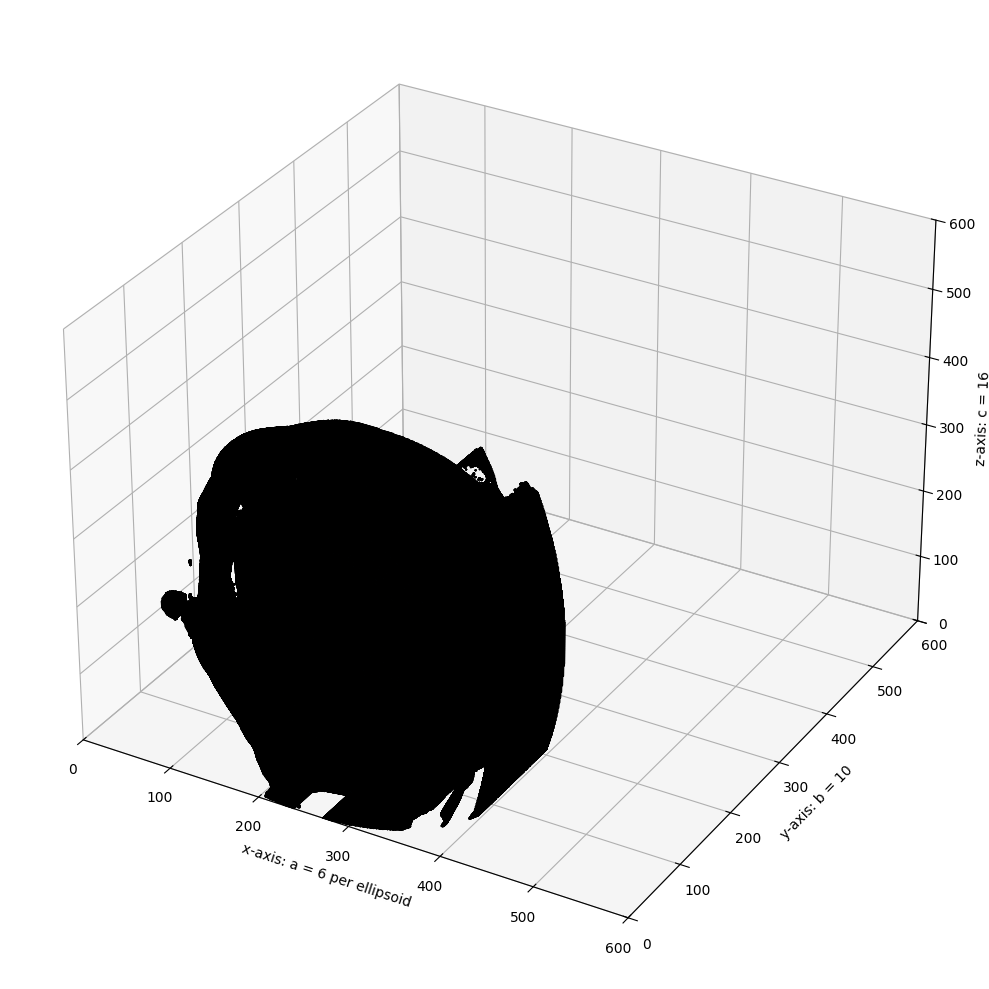

In [27]:
# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(vertices[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis: a = 6 per ellipsoid")
ax.set_ylabel("y-axis: b = 10")
ax.set_zlabel("z-axis: c = 16")

ax.set_xlim(0, 600) 
ax.set_ylim(0, 600)  
ax.set_zlim(0, 600)  
plt.tight_layout()
plt.show()

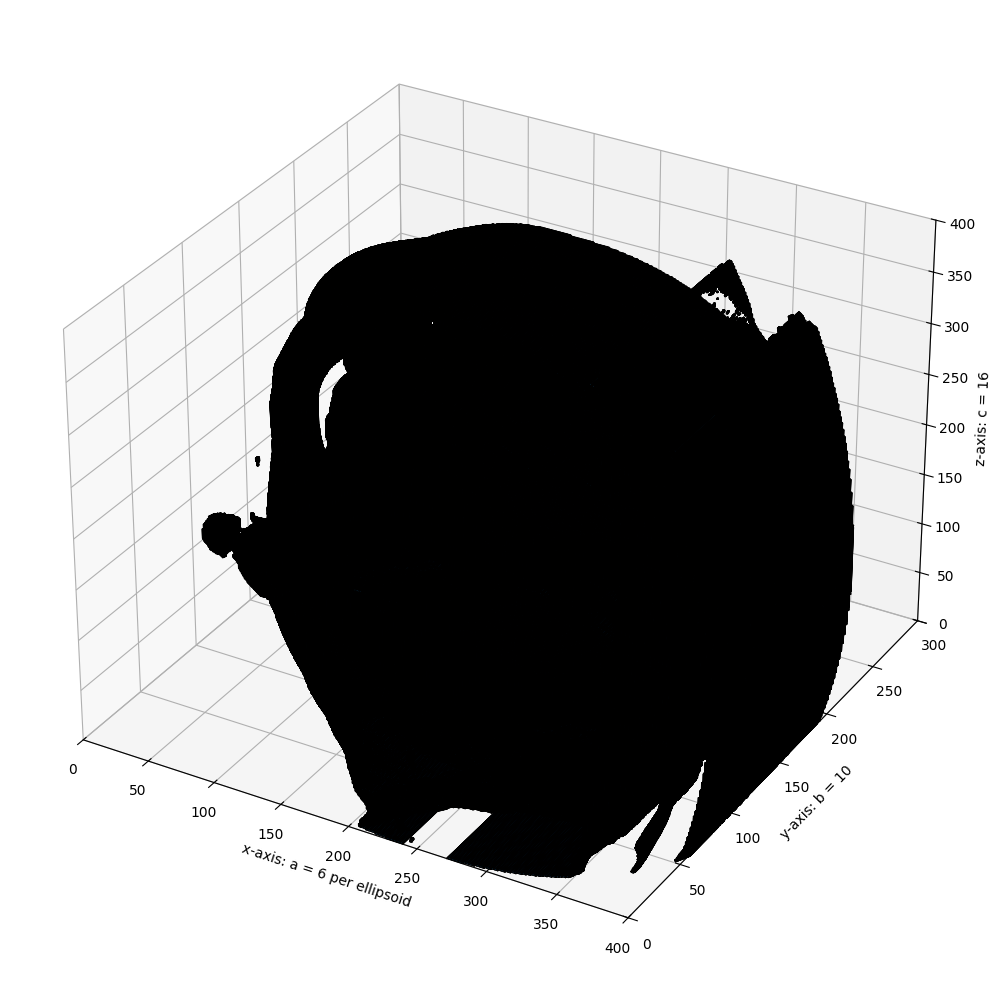

In [40]:
# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(vertices[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis: a = 6 per ellipsoid")
ax.set_ylabel("y-axis: b = 10")
ax.set_zlabel("z-axis: c = 16")

ax.set_xlim(0, 400) 
ax.set_ylim(0, 300)  
ax.set_zlim(0, 400)  
plt.tight_layout()
plt.show()

In [41]:
type(faces)

numpy.ndarray

In [42]:
type(vertices)

numpy.ndarray

Let's make sure our faces array is in the correct format for PyVista. Each face should be defined as a row in a 4*n array (where n is the number of faces), with the first column representing the number of vertices (3 for a triangle), and the next three columns representing the indices of the vertices that make up the face. Let’s adjust that:

In [55]:
# Adjust faces array for PyVista
faces_pv = np.column_stack([np.full(len(faces), 3), faces])

# Create a PyVista mesh
mesh = pv.PolyData(vertices, faces_pv)

# Visualize the mesh
mesh.plot()

Widget(value='<iframe src="http://localhost:40293/index.html?ui=P_0x7f97517869c0_5&reconnect=auto" class="pyvi…